## Probeweise Durchführung einer Teststatistik für Gesamtlängen in Tokens pro Gedicht

1. Hypothesen
- **Nullhypothese (H0)**: Es gibt zwischen den beiden Subsamples (M/W) **keinen signifikanten Unterschied** in der Gesamtlänge der Gedichte in Tokens.
- **Alternativhypothese (H1)**: Es gibt zwischen den beiden Subsamples (M/W) **einen signifikanten Unterschied** in der Gesamtlänge der Gedichte in Tokens.
    - &rarr; "Männer schreiben längere Gedichte (= mit mehr Wörtern) als Frauen. Frauen schreiben im Verlgeich zu Männern kürzere Gedichte."

In [1]:
import os
import json
import nltk
import statistics
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from scipy.stats import ttest_ind, shapiro, mannwhitneyu

ModuleNotFoundError: No module named 'nltk'

2. Daten vorbereiten

Für jedes Teilkorpus:
- Dictionary mit Gedichttitel als Key
- und Anzahl der Tokens im Gedicht

In [ ]:
# Funktion zum Zählen der Tokens in einem Gedichtstext
def count_tokens(poem_text):
    return len(word_tokenize(poem_text))

def tokens_per_poem(folder_path: str):
    # Dictionary zur Speicherung der Ergebnisse
    poem_lenghts = {}
    # Durchlaufe die JSON-Dateien im Ordner
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                poem_data = json.load(file)
                # Extrahiere den Gedichtstext aus der json-Datei
                poem_lines = [line_data['text'] for line_data in poem_data['poem'].values()]
                poem_text = ' '.join(poem_lines)
                # Zähle die Tokens im Gedichtstext
                num_tokens = count_tokens(poem_text)
                # Füge das Ergebnis zum Dictionary hinzu
                poem_lenghts[poem_data['title']] = num_tokens          
    return poem_lenghts

In [ ]:
poems_and_lengths_m = tokens_per_poem('corpus_finished_m')

# Versuch, Ausreißer aus Datensatz zu entfernen
# Ausreißer: svalbard-paem-15118
del poems_and_lengths_m[max(poems_and_lengths_m, key=poems_and_lengths_m.get)]

print(poems_and_lengths_m)

{'teiresias-2570': 78, 'gehoeft-11241': 93, 'real-life-14343': 124, 'die-schlafkammer-des-lkw-fahrers-und-sein-poesiealbum-16429': 453, 'nach-dem-loop-leben-7422': 161, 'die-kleinste-armee-15134': 59, 'trostlied-im-konjunktiv-14383': 159, 'hauptbahnhof-frankfurt-am-main-iii-12362': 107, 'meine-gespenstische-geliehene-353': 41, 'tierleben-10-4019': 65, 'als-statussymbol-16201': 256, 'aber-wir-werden-durch-den-abend-11566': 39, 'der-stille-grund-11236': 225, 'mit-sieben-augen-aufgewacht-und-keines-sieht-15222': 222, 'elementares-gedicht-2-12336': 118, 'halbfertige-zeichnung-13899': 103, 'oh-doerflichkeit-veraenderung-14337': 85, 'herde-der-rede-v-381': 258, 'als-belgien-furchtbar-war-13241': 101, 'neumen-unwelt-korollar': 158, 'mombasa-island-zweiter-juli-meine-liebste-12010': 499, 'dran-glauben-7425': 219, 'den-nachtblauen-falter-15511': 122, 'aus-dem-halbkreis-der-gefuehle-14347': 144, 'ausschreibung-zum-familienfest-13207': 659, 'dein-lippenflimmern-3373': 86, 'haengende-gaerten-15522

In [ ]:
poems_and_lengths_w = tokens_per_poem('corpus_finished_w')
print(poems_and_lengths_w)

{'jetzt-da-die-letzten-bilder-verschwunden-sind-14895': 105, 'aus-duengerkind-i-15421': 834, 'kaskade-des-gluecks-12653': 209, 'bukowina-i-545': 40, 'uraniafalter-13623': 245, 'nichts-12405': 59, 'so-augenweide-achsen-doch-als-springe-und-trete-man-rueckwaerts-15456': 105, 'vorhersehbar-infiziert-11022': 132, 'muede-wie-ich-12403': 98, 'grabende-13886': 69, 'balance-balance-1520': 68, 'hibiskus-14762': 168, 'brief-im-april-15724': 113, 'es-strahlt-ab-wie-eine-waerme-15424': 103, 'so-augenweide-achsen-als-stuende-man-am-franzoesischen-fenster-15452': 107, 'donauwuerfel-vierter-wuerfel-15111': 734, 'noch-bist-du-da-555': 48, 'loechrig-mein-speicher-14543': 11, 'donauwuerfel-erster-wuerfel-15110': 772, 'wildern-13889': 61, 'so-augenweide-achsen-man-trippelt-zu-weit-nach-links-15455': 116, 'sein-fliegen-liegt-nicht-der-anatomie-11916': 108, 'auszaehlreime-1420': 75, 'prism-10803': 231, 'wir-leben-wir-sind-fuer-alles-12652': 113, 'im-atemhaus-554': 29, 'rechenaufgabe-unter-traenen-1416': 68

3. Deskriptive Statistik
- Durchschnitt (Mittelwert)
- Standardabweichung der Verslängen für jedes Subsample

In [ ]:
def calculate_statistics(poem_lengths):
    # Berechnung des Durchschnitts (Mittelwert)
    average = statistics.mean(poem_lengths)
    
    # Berechnung der Standardabweichung
    std_deviation = statistics.stdev(poem_lengths)
    
    return average, std_deviation

# Extrahiere die Gedichtlängen aus dem Dictionary
poem_lengths_m = list(poems_and_lengths_m.values())
poem_lengths_w = list(poems_and_lengths_w.values())

# Berechne Durchschnitt und Standardabweichung
average_length_m, std_dev_m = calculate_statistics(poem_lengths_m)
average_length_w, std_dev_w = calculate_statistics(poem_lengths_w)

# Ausgabe der Ergebnisse
print("Durchschnittliche Gedichtlänge Männer:", average_length_m)
print("Durchschnittliche Gedichtlänge Frauen:", average_length_w)
print("Standardabweichung der Gedichtlänge Männer:", std_dev_m)
print("Standardabweichung der Gedichtlänge Frauen:", std_dev_w)
print("Stichprobengröße für männliche Autoren:", len(poem_lengths_m))
print("Stichprobengröße für weibliche Autoren:", len(poem_lengths_w))

Durchschnittliche Gedichtlänge Männer: 170.94776119402985
Durchschnittliche Gedichtlänge Frauen: 145.15625
Standardabweichung der Gedichtlänge Männer: 136.5978850970804
Standardabweichung der Gedichtlänge Frauen: 150.50366864736483
Stichprobengröße für männliche Autoren: 134
Stichprobengröße für weibliche Autoren: 96


4. Statistischer Test

## Teststatistik: t-Test?
Vorausssetzung ist Normalverteilung, also Normalverteilung der Tokenfrequency testen:

+ Ausreißer entfernen (siehe Stefanowitsch, Kap. 6, S. 192)
    - hier einen Ausreißer im Subsample 'M' entfernt

In [ ]:
# Funktion zum Durchführen des Shapiro-Wilk-Tests und zur Interpretation der Ergebnisse
def test_normality(data, sample_name):
    stat, p_value = shapiro(data)
    alpha = 0.05  # Signifikanzniveau
    print(f"Shapiro-Wilk-Test für {sample_name}:")
    print("Teststatistik:", stat)
    print("p-Wert:", p_value)
    if p_value > alpha:
        print(f"Die Tokenfrequenzen für {sample_name} sind normalverteilt.")
    else:
        print(f"Die Tokenfrequenzen für {sample_name} sind nicht normalverteilt.")

# Durchführung des Tests für beide Subsamples
test_normality(poem_lengths_m, "Sample M")
test_normality(poem_lengths_w, "Sample W")

Shapiro-Wilk-Test für Sample M:
Teststatistik: 0.830564022064209
p-Wert: 3.968428363698706e-11
Die Tokenfrequenzen für Sample M sind nicht normalverteilt.
Shapiro-Wilk-Test für Sample W:
Teststatistik: 0.5915873050689697
p-Wert: 6.208495275907477e-15
Die Tokenfrequenzen für Sample W sind nicht normalverteilt.


&rarr; keine Normalverteilung, also anderer Test, nicht t-Test?

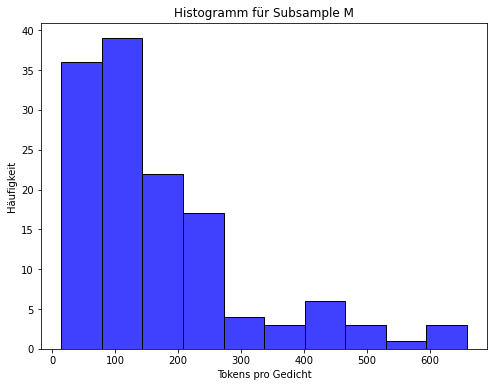

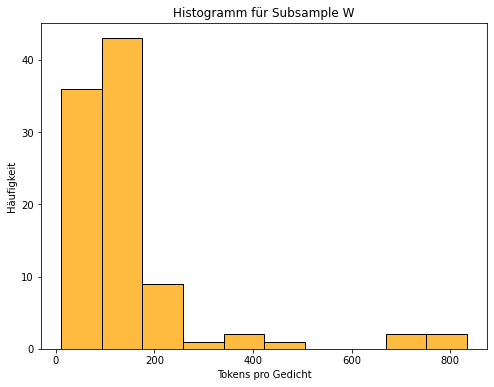

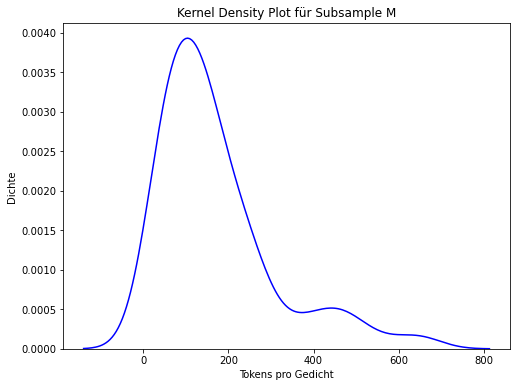

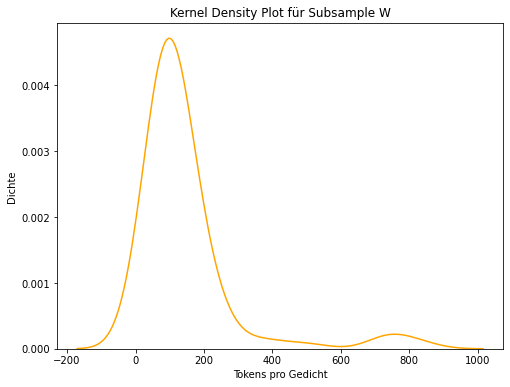

In [ ]:
# Histogramm für Subsample M
plt.figure(figsize=(8, 6))
sns.histplot(poem_lengths_m, kde=False, color='blue', bins=10)
plt.title('Histogramm für Subsample M')
plt.xlabel('Tokens pro Gedicht')
plt.ylabel('Häufigkeit')
plt.show()

# Histogramm für Subsample W
plt.figure(figsize=(8, 6))
sns.histplot(poem_lengths_w, kde=False, color='orange', bins=10)
plt.title('Histogramm für Subsample W')
plt.xlabel('Tokens pro Gedicht')
plt.ylabel('Häufigkeit')
plt.show()

# Kernel Density Plot für Subsample M
plt.figure(figsize=(8, 6))
sns.kdeplot(poem_lengths_m, color='blue')
plt.title('Kernel Density Plot für Subsample M')
plt.xlabel('Tokens pro Gedicht')
plt.ylabel('Dichte')
plt.show()

# Kernel Density Plot für Subsample W
plt.figure(figsize=(8, 6))
sns.kdeplot(poem_lengths_w, color='orange')
plt.title('Kernel Density Plot für Subsample W')
plt.xlabel('Tokens pro Gedicht')
plt.ylabel('Dichte')
plt.show()

## Versuch: t-Test
- Begründung: eine unschöne, aber mögliche Option, weil t-Test relativ robust ist (siehe Stefanowitsch, Kap. 6, S. 197)

In [ ]:
# Signifikanztest (t-Test)
t_statistic, p_value = ttest_ind(poem_lengths_m, poem_lengths_w)

# Berechne die Degrees of Freedom (Freiheitsgrade)
# Degrees of Freedom = (Anzahl der Beobachtungen in Sample 1) + (Anzahl der Beobachtungen in Sample 2) - 2
sample_size_m = len(poem_lengths_m)
sample_size_w = len(poem_lengths_w)
degrees_of_freedom = sample_size_m + sample_size_w - 2

print("Ergebnisse des t-Tests:")
print("t-Statistik:", t_statistic)
print("p-Wert:", p_value)
print("Freiheitsgrad:", degrees_of_freedom)

if p_value > 0.05:
    print("Es gibt keinen signifikanten Unterschied zwischen den Subsamples.")
else:
    print("Es gibt einen signifikanten Unterschied zwischen den Subsamples.")
    
print(f"(t({degrees_of_freedom}) = {round(t_statistic, 3)}, p > 0.05)")

Ergebnisse des t-Tests:
t-Statistik: 1.3530462294945456
p-Wert: 0.1773809546171936
Freiheitsgrad: 228
Es gibt keinen signifikanten Unterschied zwischen den Subsamples.
(t(228) = 1.353, p > 0.05)


- Test scheitert nicht, Voraussetzungen dafür sind aber eigentlich nicht gegeben
- Ergebnis: **&rarr; Nullhypothese kann nicht abgelehnt werden.**

## &rarr; **Mann-Whitney-U-Test** (= Test für Ordinaldaten)
- Ausweichmöglichkeit, wenn t-Test wegen nicht normalverteilten Daten nicht sinnvoll ist (siehe Stefanowitsch, Kap. 6, S. 198)

In [ ]:
# Durchführung des Mann-Whitney-U-Tests
u_statistic, p_value = mannwhitneyu(poem_lengths_m, poem_lengths_w, alternative='two-sided')

# Ausgabe der Ergebnisse
print("Mann-Whitney-U-Test:")
print("U-Statistik:", u_statistic)
print("p-Wert:", p_value)

if p_value > 0.05:
    print("Es gibt keinen signifikanten Unterschied zwischen den Subsamples.")
else:
    print("Es gibt einen signifikanten Unterschied zwischen den Subsamples.")

print(f"(U = {u_statistic}, N1 = {sample_size_m}, N2 = {sample_size_w}, p < 0.05)")

Mann-Whitney-U-Test:
U-Statistik: 7482.0
p-Wert: 0.034938380115309545
Es gibt einen signifikanten Unterschied zwischen den Subsamples.
(U = 7482.0, N1 = 134, N2 = 96, p < 0.05)


**&rarr; Unterschied zwischen Gedichtlänge in den zwei Teilkorpora für Frauen und Männer ist signifikant!**

- p-Wert ist liegt unter 0.05
- *In unserem Korpus gibt es zwischen den beiden Teilkorpora für Gedichte von Männern und Frauen einen signifikanten Unterschied hinsichtlich der Gesamtlänge der Gedichte in Tokens. Der Mann-Whitney-U-Test ergab, dass es die Gedichte der Männer im Korpus signifikant länger sind, als die der Frauen.*

Berechnung der **Effektstärke**

- Effektstärke Cramer's V liegt zwischen 0 und 1
- stärker, desto näher an 1 liegt; stärkerer Unterschied zwischen den Subsamples
- 0.76 = stark

In [ ]:
# Berechne die Effektstärke für Mann-Whitney-U-Test (Cramer's V)
n1 = len(poem_lengths_m)
n2 = len(poem_lengths_w)
effect_size = np.sqrt(u_statistic / (n1 * n2))

print("Effektstärke (Cramer's V):", effect_size)

Effektstärke (Cramer's V): 0.7626422059710295


5. Visualisierung

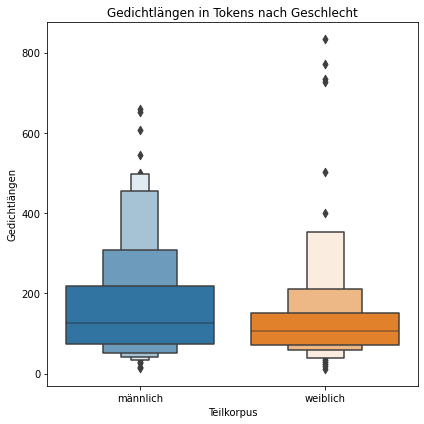

In [ ]:
# Zusammenführen der Daten in einem DataFrame für seaborn
import pandas as pd
data = pd.DataFrame({
    "Geschlecht": ["männlich"] * sample_size_m + ["weiblich"] * sample_size_w,
    "Durchschnittliche Verslänge": poem_lengths_m + poem_lengths_w
})

# Boxplot erstellen
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxenplot(x="Geschlecht", y="Durchschnittliche Verslänge", data=data, ax=ax)

# Label und Titel bestimmen
plt.xlabel("Teilkorpus")
plt.ylabel("Gedichtlängen")
plt.title("Gedichtlängen in Tokens nach Geschlecht")


# Plot anzeigen
plt.tight_layout()
plt.show()

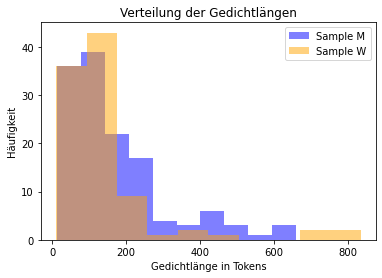

In [ ]:
# Erstelle eine Figure und Axes-Objekte
fig, ax = plt.subplots()

# Plotten der Histogramme für beide Subsamples
ax.hist(poem_lengths_m, bins=10, alpha=0.5, label='Sample M', color='blue')
ax.hist(poem_lengths_w, bins=10, alpha=0.5, label='Sample W', color='orange')

# Hinzufügen von Labels und Titeln
ax.set_xlabel('Gedichtlänge in Tokens')
ax.set_ylabel('Häufigkeit')
ax.set_title('Verteilung der Gedichtlängen')

# Legende anzeigen
ax.legend()

# Anzeigen der Grafik
plt.show()